In [16]:
import os 
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv("Disaggregated_data_stunting_csv.csv", encoding="latin1")

In [5]:
df.head()

,Countries_and_areas,UNICEF_Regions,UN_Regions,WHO_Regions,World_Bank_Income_Groups,Year,Full_Source_Title,Latest_Estimate,Estimate_Type,_National_Point_Estimate,...,Male_48_to_59_months_Point_Estimate,Male_24_to_59_months_Point_Estimate,Female_0_to_5_months_Point_Estimate,Female_6_to_11_months_Point_Estimate,Female_12_to_23_months_Point_Estimate,Female_0_to_23_months_Point_Estimate,Female_24_to_35_months_Point_Estimate,Female_36_to_47_months_Point_Estimate,Female_48_to_59_months_Point_Estimate,Female_24_to_59_months_Point_Estimate
0,Afghanistan,SA,Asia,EMRO,Low Income,1997,Afghanistan 1997 multiple indicator baseline (...,Historical Trend,Adjusted,53.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,SA,Asia,EMRO,Low Income,2004,Summary report of the national nutrition surve...,Historical Trend,External Reanalysis,59.3,...,62.5,NaN,NaN,36.5,51.1,NaN,70.4,64.2,61.4,NaN
2,Afghanistan,SA,Asia,EMRO,Low Income,2013,Afghanistan National Nutrition Survey 2013,Historical Trend,Reanalyzed,40.4,...,40.0,44.1,21.3,27.1,37.5,30.6,45.9,46.0,46.6,46.1
3,Afghanistan,SA,Asia,EMRO,Low Income,2018,Afghanistan Health Survey 2018,Latest Source,Reanalyzed,38.2,...,45.2,45.9,14.5,17.3,28.8,22.4,46.8,47.1,50.3,47.9
4,Albania,EECA,Europe,EURO,Upper Middle Income,2005,Albania multiple indicator cluster survey 2005...,Historical Trend,Reanalyzed,26.7,...,27.3,28.4,26.6,23.2,18.6,21.9,21.6,31.4,21.7,24.7


In [8]:
df.shape, df.columns

((1051, 83),
 Index(['Countries_and_areas', 'UNICEF_Regions', 'UN_Regions', 'WHO_Regions',
        'World_Bank_Income_Groups', 'Year', 'Full_Source_Title',
        'Latest_Estimate', 'Estimate_Type', '_National_Point_Estimate',
        'Male_Point_Estimate', 'Female_Point_Estimate', 'Urban_Point_Estimate',
        'Rural_Point_Estimate', '0_to_5_months_Point_Estimate',
        '6_to_11_months_Point_Estimate', '12_to_23_months_Point_Estimate',
        '0_to_23_months_Point_Estimate', '24_to_35_months_Point_Estimate',
        '36_to_47_months_Point_Estimate', '48_to_59_months_Point_Estimate',
        '24_to_59_months_Point_Estimate', 'Wealth_Quintile_1_Point_Estimate',
        'Wealth_Quintile_2_Point_Estimate', 'Wealth_Quintile_3_Point_Estimate',
        'Wealth_Quintile_4_Point_Estimate', 'Wealth_Quintile_5_Point_Estimate',
        'Bottom_80%_Point_Estimate', 'Top_20%_Point_Estimate',
        'Bottom_60%_Point_Estimate', 'Top_40%_Point_Estimate',
        'Bottom_40%_Point_Estimate', '

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 83 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Countries_and_areas                                   1051 non-null   object 
 1   UNICEF_Regions                                        1040 non-null   object 
 2   UN_Regions                                            1051 non-null   object 
 3   WHO_Regions                                           1051 non-null   object 
 4   World_Bank_Income_Groups                              1051 non-null   object 
 5   Year                                                  1051 non-null   int64  
 6   Full_Source_Title                                     1051 non-null   object 
 7   Latest_Estimate                                       1051 non-null   object 
 8   Estimate_Type                                         1051

In [11]:
df.rename(columns={'Countries_and_areas':'Country','_National_Point_Estimate':'National_Point_Estimate'},inplace=True)

In [65]:
df['Country'].value_counts()

Bangladesh           30
Viet Nam             27
Niger                23
Jamaica              22
Kuwait               21
                     ..
Brunei Darussalam     1
Greece                1
Japan                 1
Marshall Islands      1
Portugal              1
Name: Country, Length: 159, dtype: int64

In [78]:
df.groupby(['Year','World_Bank_Income_Groups', 'Country']).agg({'Country':'count'})

Country
Year World_Bank_Income_Groups Country                             
1983 Lower Middle Income      Papua New Guinea                   1
1985 Low Income               Niger                              1
     Lower Middle Income      Cabo Verde                         1
                              Kiribati                           1
     Upper Middle Income      Mauritius                          1
...                                                            ...
2022 Low Income               Niger                              1
     Lower Middle Income      Kenya                              1
                              Mauritania                         1
                              Nepal                              1
                              United Republic of Tanzania        1

[1013 rows x 1 columns]

In [84]:
df[df['Year']==1991]['Country'].value_counts()

Bangladesh                            1
Oman                                  1
Venezuela (Bolivarian Republic of)    1
United States                         1
United Republic of Tanzania           1
Senegal                               1
Romania                               1
Peru                                  1
Pakistan                              1
Myanmar                               1
Cameroon                              1
Jamaica                               1
Iraq                                  1
India                                 1
Honduras                              1
Egypt                                 1
Dominican Republic                    1
Czechia                               1
Yemen                                 1
Name: Country, dtype: int64

## Plot correlation for verification

In [23]:
non_null_columns = ['National_Point_Estimate']
object_cols = ['Country', 'UNICEF_Regions', 'UN_Regions', 'WHO_Regions',
        'World_Bank_Income_Groups', 'Year', 'Full_Source_Title',
        'Latest_Estimate', 'Estimate_Type', 'National_Point_Estimate']
null_cols_to_fillna = list(df.drop(object_cols, 1).columns)

C:\Users\shara\AppData\Local\Temp\ipykernel_20644\3765070173.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  null_cols_to_fillna = list(df.drop(object_cols, 1).columns)


In [24]:
len(null_cols_to_fillna)

73

In [25]:
df[df['Country']=='India'][null_cols_to_fillna + non_null_columns]

,Male_Point_Estimate,Female_Point_Estimate,Urban_Point_Estimate,Rural_Point_Estimate,0_to_5_months_Point_Estimate,6_to_11_months_Point_Estimate,12_to_23_months_Point_Estimate,0_to_23_months_Point_Estimate,24_to_35_months_Point_Estimate,36_to_47_months_Point_Estimate,...,Male_24_to_59_months_Point_Estimate,Female_0_to_5_months_Point_Estimate,Female_6_to_11_months_Point_Estimate,Female_12_to_23_months_Point_Estimate,Female_0_to_23_months_Point_Estimate,Female_24_to_35_months_Point_Estimate,Female_36_to_47_months_Point_Estimate,Female_48_to_59_months_Point_Estimate,Female_24_to_59_months_Point_Estimate,National_Point_Estimate
373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.7
374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9
375,58.4,55.8,50.2,59.2,27.3,39.5,58.7,45.8,69.4,71.1,...,70.5,24.2,37.5,57.5,43.7,69.0,71.0,NaN,70.0,57.1
376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.9
377,51.1,50.8,41.1,54.0,27.5,36.6,58.4,44.5,65.7,NaN,...,64.8,27.0,34.8,57.9,44.0,66.6,NaN,NaN,66.6,51.0
378,47.8,47.8,39.5,50.4,22.6,30.3,52.3,39.5,55.5,54.0,...,52.4,22.4,28.8,51.8,38.5,55.2,55.1,51.3,53.9,47.8
379,39.5,37.9,32.0,41.6,17.1,NaN,NaN,NaN,42.8,44.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.7
380,38.3,37.5,30.6,40.7,20.6,23.5,42.7,32.6,41.8,42.6,...,40.8,19.2,21.0,40.4,30.5,41.4,43.4,41.1,42.0,37.9
381,35.4,34.0,27.3,37.0,8.9,NaN,NaN,NaN,44.3,41.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.7
382,36.2,34.6,30.1,37.3,24.4,24.7,39.8,32.2,38.1,39.2,...,37.4,22.6,22.4,37.3,29.9,37.4,39.5,36.3,37.7,35.5


In [35]:
corr_vals = []
for col in null_cols_to_fillna:
    df_new = df[[col, 'National_Point_Estimate']]
    df_new = df_new.dropna()
    corr_vals.append(round(df_new.corr().loc[col]['National_Point_Estimate'], 4))
df_corr = pd.DataFrame({'columns':null_cols_to_fillna, 'correlation':corr_vals})

In [40]:
df_corr

,columns,correlation
0,Male_Point_Estimate,0.9969
1,Female_Point_Estimate,0.9964
2,Urban_Point_Estimate,0.9521
3,Rural_Point_Estimate,0.9746
4,0_to_5_months_Point_Estimate,0.6637
...,...,...
68,Female_0_to_23_months_Point_Estimate,0.9466
69,Female_24_to_35_months_Point_Estimate,0.9736
70,Female_36_to_47_months_Point_Estimate,0.9775
71,Female_48_to_59_months_Point_Estimate,0.9599


In [37]:
df_corr['correlation'].describe()

count    73.000000
mean      0.927430
std       0.081897
min       0.602800
25%       0.912300
50%       0.954200
75%       0.976100
max       0.998100
Name: correlation, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, 'Male_Point_Estimate'),
  Text(1, 0, 'Female_Point_Estimate'),
  Text(2, 0, 'Urban_Point_Estimate'),
  Text(3, 0, 'Rural_Point_Estimate'),
  Text(4, 0, '0_to_5_months_Point_Estimate'),
  Text(5, 0, '6_to_11_months_Point_Estimate'),
  Text(6, 0, '12_to_23_months_Point_Estimate'),
  Text(7, 0, '0_to_23_months_Point_Estimate'),
  Text(8, 0, '24_to_35_months_Point_Estimate'),
  Text(9, 0, '36_to_47_months_Point_Estimate'),
  Text(10, 0, '48_to_59_months_Point_Estimate'),
  Text(11, 0, '24_to_59_months_Point_Estimate'),
  Text(12, 0, 'Wealth_Quintile_1_Point_Estimate'),
  Text(13, 0, 'Wealth_Quintile_2_Point_Estimate'),
  Text(14, 0, 'Wealth_Quintile

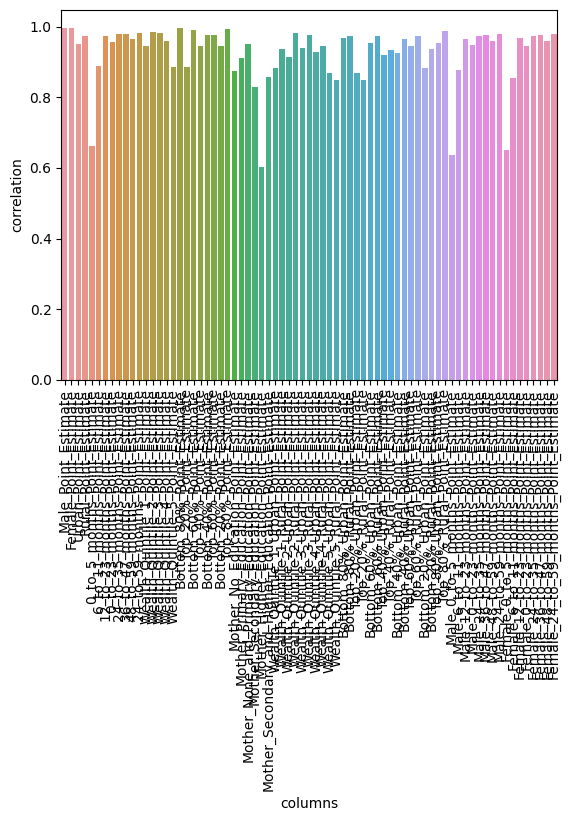

In [39]:
sns.heatmap(df_corr, x='columns', y='correlation')
plt.xticks(rotation=90)

## FillNA using LinearRegression because of high correlation

In [43]:
df_clean = df.copy()
for col in null_cols_to_fillna:
    df_new = df[[col, 'National_Point_Estimate']].dropna()
    lr = LinearRegression()
    lr.fit(df_new[['National_Point_Estimate']], df_new[col])
    #print(f"{col} - {lr.coef_} - {lr.intercept_}")
    df_clean[col].fillna(pd.Series(lr.predict(df_clean[['National_Point_Estimate']])), inplace=True)

In [57]:
for col in null_cols_to_fillna:
    print(f"{col} - {(df_clean[col] == df[col]).sum()}")

Male_Point_Estimate - 860
Female_Point_Estimate - 860
Urban_Point_Estimate - 661
Rural_Point_Estimate - 660
0_to_5_months_Point_Estimate - 755
6_to_11_months_Point_Estimate - 806
12_to_23_months_Point_Estimate - 815
0_to_23_months_Point_Estimate - 758
24_to_35_months_Point_Estimate - 827
36_to_47_months_Point_Estimate - 799
48_to_59_months_Point_Estimate - 788
24_to_59_months_Point_Estimate - 762
Wealth_Quintile_1_Point_Estimate - 462
Wealth_Quintile_2_Point_Estimate - 463
Wealth_Quintile_3_Point_Estimate - 463
Wealth_Quintile_4_Point_Estimate - 463
Wealth_Quintile_5_Point_Estimate - 463
Bottom_80%_Point_Estimate - 438
Top_20%_Point_Estimate - 438
Bottom_60%_Point_Estimate - 438
Top_40%_Point_Estimate - 438
Bottom_40%_Point_Estimate - 438
Top_60%_Point_Estimate - 438
Bottom_20%_Point_Estimate - 437
Top_80%_Point_Estimate - 438
Mother_No_Education_Point_Estimate - 356
Mother_Primary_Education_Point_Estimate - 424
Mother_None_and_Primary_Education_Point_Estimate - 433
Mother_Secondary_Ed

In [59]:
df_corr[df_corr['correlation']<0.7]

,columns,correlation
4,0_to_5_months_Point_Estimate,0.6637
29,Mother_Higher_Education_Point_Estimate,0.6028
57,Male_0_to_5_months_Point_Estimate,0.6372
65,Female_0_to_5_months_Point_Estimate,0.6520


# Visualisations

### Line plot of National Point Estimate for few countries 

In [70]:
lst_countries = ['India','China','Bangladesh','United States','Pakistan']
df_time_series = df_clean[df_clean['Country'].isin(lst_countries)][['Country','Year','National_Point_Estimate']]

<AxesSubplot: xlabel='Year', ylabel='National_Point_Estimate'>

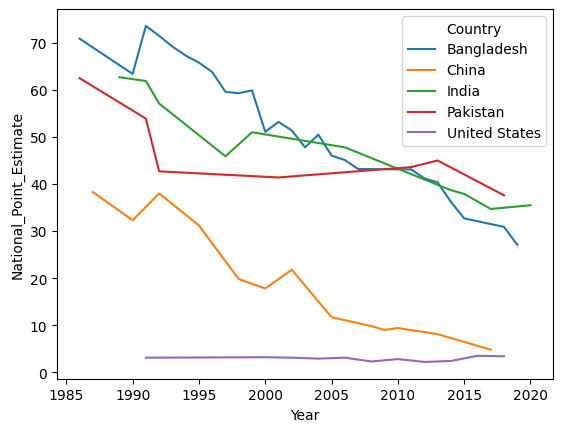

In [73]:
sns.lineplot(df_time_series,x='Year',y='National_Point_Estimate',hue='Country')

### Gender comparison across income groups of countries

In [88]:
df['Year'].sort_values().unique()

array([1983, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [89]:
def get_year_group(x):
    if x<2000:
        return '90s'
    elif x >= 2000 and x < 2010:
        return '2000s'
    else:
        return '2010+'
    
df_clean['year_group'] = df_clean['Year'].apply(lambda x: get_year_group(x))
df_clean['year_group'].value_counts()

2010+    454
2000s    322
90s      275
Name: year_group, dtype: int64

In [96]:
df_clean.columns

Index(['Country', 'UNICEF_Regions', 'UN_Regions', 'WHO_Regions',
       'World_Bank_Income_Groups', 'Year', 'Full_Source_Title',
       'Latest_Estimate', 'Estimate_Type', 'National_Point_Estimate',
       'Male_Point_Estimate', 'Female_Point_Estimate', 'Urban_Point_Estimate',
       'Rural_Point_Estimate', '0_to_5_months_Point_Estimate',
       '6_to_11_months_Point_Estimate', '12_to_23_months_Point_Estimate',
       '0_to_23_months_Point_Estimate', '24_to_35_months_Point_Estimate',
       '36_to_47_months_Point_Estimate', '48_to_59_months_Point_Estimate',
       '24_to_59_months_Point_Estimate', 'Wealth_Quintile_1_Point_Estimate',
       'Wealth_Quintile_2_Point_Estimate', 'Wealth_Quintile_3_Point_Estimate',
       'Wealth_Quintile_4_Point_Estimate', 'Wealth_Quintile_5_Point_Estimate',
       'Bottom_80%_Point_Estimate', 'Top_20%_Point_Estimate',
       'Bottom_60%_Point_Estimate', 'Top_40%_Point_Estimate',
       'Bottom_40%_Point_Estimate', 'Top_60%_Point_Estimate',
       'Bottom_

In [101]:
df_gend_sct = pd.DataFrame()
cols_reqd = ['Male_Point_Estimate', 'Female_Point_Estimate', 'year_group', 'Country', 'World_Bank_Income_Groups']
for grp, df_grp in df_clean.groupby(['year_group', 'Country']):
    max_year = df_grp['Year'].max()
    if df_grp[df_grp['Year']==max_year].shape[0] == 1:
        df_gend_sct = pd.concat([df_gend_sct, df_grp[df_grp['Year']==max_year][cols_reqd]])
    else:
        df_gend_sct = pd.concat([df_gend_sct, df_grp[df_grp['Year']==max_year].sample(1)[cols_reqd]])
#         print(f"For {grp} there are more than 1 row")

In [103]:
df_gend_sct.shape

(402, 5)

<AxesSubplot: xlabel='Female_Point_Estimate', ylabel='Male_Point_Estimate'>

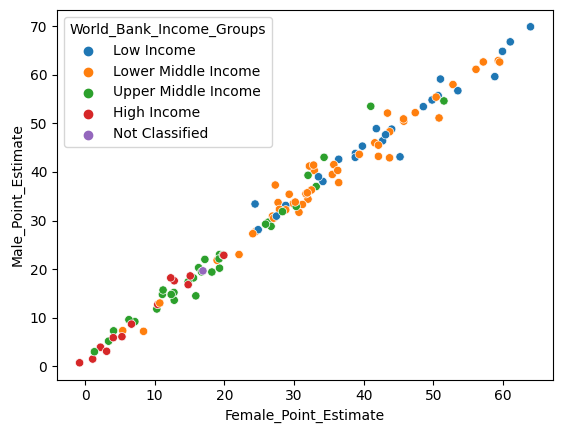

In [106]:
sns.scatterplot(df_gend_sct[df_gend_sct['year_group'] == '90s'],x='Female_Point_Estimate',y='Male_Point_Estimate',hue='World_Bank_Income_Groups')

<AxesSubplot: xlabel='Female_Point_Estimate', ylabel='Male_Point_Estimate'>

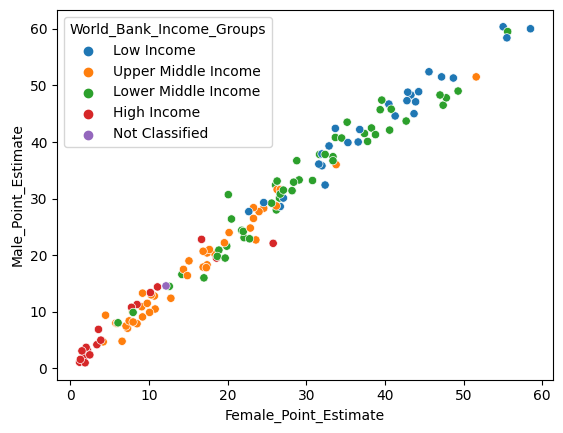

In [107]:
sns.scatterplot(df_gend_sct[df_gend_sct['year_group'] == '2000s'],x='Female_Point_Estimate',y='Male_Point_Estimate',hue='World_Bank_Income_Groups')

<AxesSubplot: xlabel='Female_Point_Estimate', ylabel='Male_Point_Estimate'>

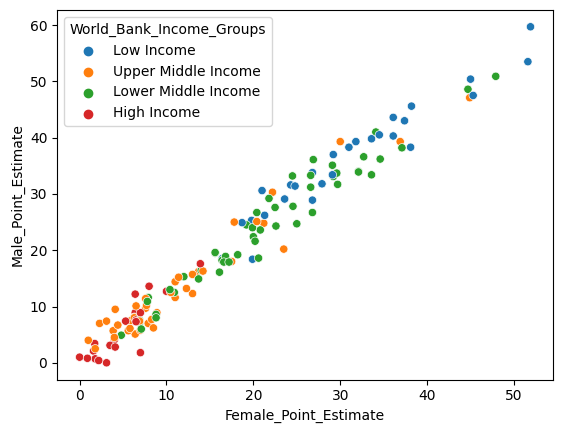

In [108]:
sns.scatterplot(df_gend_sct[df_gend_sct['year_group'] == '2010+'],x='Female_Point_Estimate',y='Male_Point_Estimate',hue='World_Bank_Income_Groups')

In [109]:

df_gend_sct[(df_gend_sct['Country'].isin(lst_countries))]

,Male_Point_Estimate,Female_Point_Estimate,year_group,Country,World_Bank_Income_Groups
56,43.700000,42.700000,2000s,Bangladesh,Lower Middle Income
190,10.029658,7.926002,2000s,China,Upper Middle Income
378,47.800000,47.800000,2000s,India,Lower Middle Income
695,42.100000,40.600000,2000s,Pakistan,Lower Middle Income
955,3.100000,1.500000,2000s,United States,High Income
65,27.801690,24.559938,2010+,Bangladesh,Lower Middle Income
193,5.689976,3.864227,2010+,China,Upper Middle Income
382,36.200000,34.600000,2010+,India,Lower Middle Income
698,38.200000,37.100000,2010+,Pakistan,Lower Middle Income
960,2.800000,4.100000,2010+,United States,High Income


## Urban/Rural comparison across income groups of countries

In [114]:
df_geo_sct = pd.DataFrame()
cols_reqd = ['Urban_Point_Estimate', 'Rural_Point_Estimate', 'year_group', 'Country', 'World_Bank_Income_Groups']
for grp, df_grp in df_clean.groupby(['year_group', 'Country']):
    max_year = df_grp['Year'].max()
    if df_grp[df_grp['Year']==max_year].shape[0] == 1:
        df_geo_sct = pd.concat([df_geo_sct, df_grp[df_grp['Year']==max_year][cols_reqd]])
    else:
        df_geo_sct = pd.concat([df_geo_sct, df_grp[df_grp['Year']==max_year].sample(1)[cols_reqd]])
#         print(f"For {grp} there are more than 1 row")

In [115]:
df_geo_sct.shape

(402, 5)

In [116]:
df_geo_sct.head()

,Urban_Point_Estimate,Rural_Point_Estimate,year_group,Country,World_Bank_Income_Groups
1,45.708674,63.162276,2000s,Afghanistan,Low Income
5,22.700000,23.500000,2000s,Albania,Upper Middle Income
12,14.400000,16.600000,2000s,Algeria,Lower Middle Income
16,22.721006,32.604126,2000s,Angola,Lower Middle Income
20,5.919389,10.269266,2000s,Argentina,Upper Middle Income


<AxesSubplot: xlabel='Urban_Point_Estimate', ylabel='Rural_Point_Estimate'>

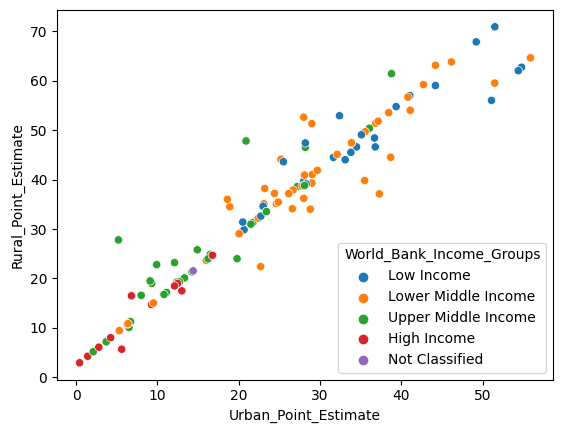

In [117]:
sns.scatterplot(df_geo_sct[df_geo_sct['year_group'] == '90s'],x='Urban_Point_Estimate',y='Rural_Point_Estimate',hue='World_Bank_Income_Groups')

<AxesSubplot: xlabel='Urban_Point_Estimate', ylabel='Rural_Point_Estimate'>

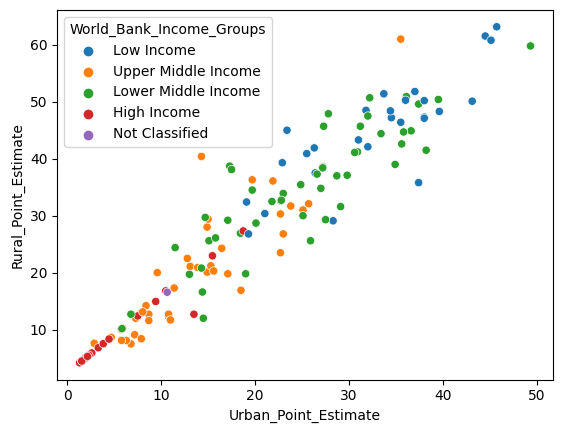

In [123]:
sns.scatterplot(df_geo_sct[df_geo_sct['year_group'] == '2000s'],x='Urban_Point_Estimate',y='Rural_Point_Estimate',hue='World_Bank_Income_Groups')

<AxesSubplot: xlabel='Urban_Point_Estimate', ylabel='Rural_Point_Estimate'>

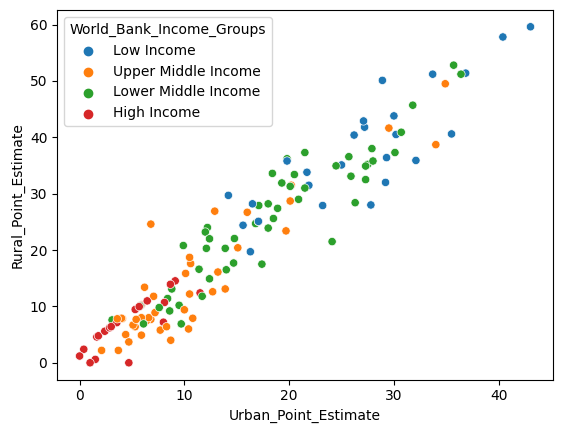

In [124]:
sns.scatterplot(df_geo_sct[df_geo_sct['year_group'] == '2010+'],x='Urban_Point_Estimate',y='Rural_Point_Estimate',hue='World_Bank_Income_Groups')

In [128]:
df_geo_sct[(df_geo_sct['Country'].isin(lst_countries))]

,Urban_Point_Estimate,Rural_Point_Estimate,year_group,Country,World_Bank_Income_Groups
56,36.600000,44.900000,2000s,Bangladesh,Lower Middle Income
190,7.294066,12.096663,2000s,China,Upper Middle Income
378,39.500000,50.400000,2000s,India,Lower Middle Income
695,35.800000,44.700000,2000s,Pakistan,Lower Middle Income
955,2.177210,5.294683,2000s,United States,High Income
66,26.300000,28.400000,2010+,Bangladesh,Lower Middle Income
193,4.086485,7.832736,2010+,China,Upper Middle Income
382,30.100000,37.300000,2010+,India,Lower Middle Income
698,30.700000,40.900000,2010+,Pakistan,Lower Middle Income
960,3.017291,6.411426,2010+,United States,High Income


## Mother's education comparison across income groups of countries

In [121]:
df_mom_ed_sct = pd.DataFrame()
cols_reqd = ['Mother_None_and_Primary_Education_Point_Estimate', 'Mother_Secondary_and_Higher_Education_Point_Estimate', 'year_group', 'Country', 'World_Bank_Income_Groups']
for grp, df_grp in df_clean.groupby(['year_group', 'Country']):
    max_year = df_grp['Year'].max()
    if df_grp[df_grp['Year']==max_year].shape[0] == 1:
        df_mom_ed_sct = pd.concat([df_mom_ed_sct, df_grp[df_grp['Year']==max_year][cols_reqd]])
    else:
        df_mom_ed_sct = pd.concat([df_mom_ed_sct, df_grp[df_grp['Year']==max_year].sample(1)[cols_reqd]])
#         print(f"For {grp} there are more than 1 row")

In [122]:
df_mom_ed_sct.shape

(402, 5)

<AxesSubplot: xlabel='Mother_None_and_Primary_Education_Point_Estimate', ylabel='Mother_Secondary_and_Higher_Education_Point_Estimate'>

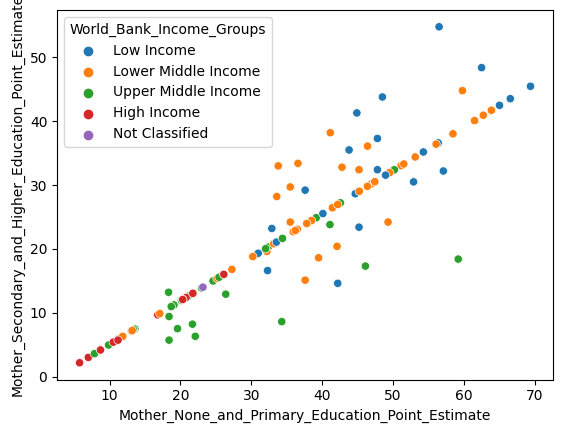

In [125]:
sns.scatterplot(df_mom_ed_sct[df_mom_ed_sct['year_group'] == '90s'],x='Mother_None_and_Primary_Education_Point_Estimate',y='Mother_Secondary_and_Higher_Education_Point_Estimate',hue='World_Bank_Income_Groups')

<AxesSubplot: xlabel='Mother_None_and_Primary_Education_Point_Estimate', ylabel='Mother_Secondary_and_Higher_Education_Point_Estimate'>

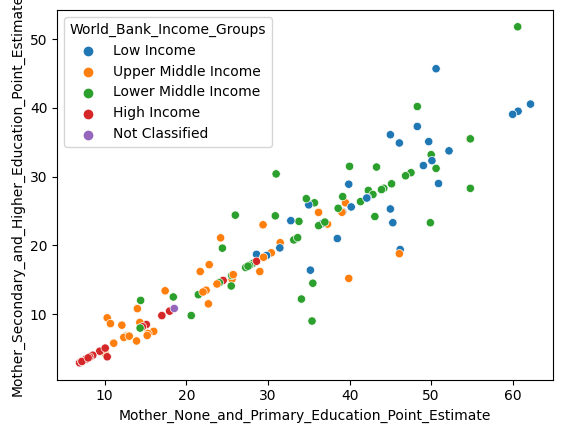

In [126]:
sns.scatterplot(df_mom_ed_sct[df_mom_ed_sct['year_group'] == '2000s'],x='Mother_None_and_Primary_Education_Point_Estimate',y='Mother_Secondary_and_Higher_Education_Point_Estimate',hue='World_Bank_Income_Groups')

<AxesSubplot: xlabel='Mother_None_and_Primary_Education_Point_Estimate', ylabel='Mother_Secondary_and_Higher_Education_Point_Estimate'>

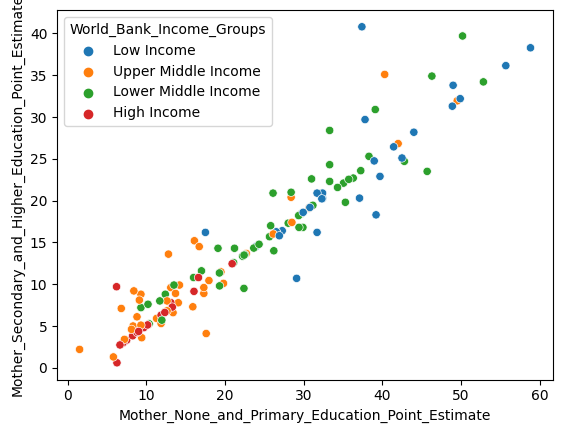

In [127]:
sns.scatterplot(df_mom_ed_sct[df_mom_ed_sct['year_group'] == '2010+'],x='Mother_None_and_Primary_Education_Point_Estimate',y='Mother_Secondary_and_Higher_Education_Point_Estimate',hue='World_Bank_Income_Groups')

In [129]:
df_mom_ed_sct[(df_mom_ed_sct['Country'].isin(lst_countries))]

,Mother_None_and_Primary_Education_Point_Estimate,Mother_Secondary_and_Higher_Education_Point_Estimate,year_group,Country,World_Bank_Income_Groups
56,50.000000,33.200000,2000s,Bangladesh,Lower Middle Income
190,14.335907,7.978904,2000s,China,Upper Middle Income
378,54.800000,35.500000,2000s,India,Lower Middle Income
695,45.147334,28.961559,2000s,Pakistan,Lower Middle Income
955,7.964408,3.639898,2000s,United States,High Income
65,30.692590,19.117844,2010+,Bangladesh,Lower Middle Income
193,10.341833,5.258930,2010+,China,Upper Middle Income
382,46.300000,34.900000,2010+,India,Lower Middle Income
698,45.700000,23.500000,2010+,Pakistan,Lower Middle Income
960,9.010475,4.352273,2010+,United States,High Income


## Malnutrition distribution across Wealth quintile 

In [132]:
ftrs_sel = ['World_Bank_Income_Groups', 'Wealth_Quintile_1_Point_Estimate',
       'Wealth_Quintile_2_Point_Estimate', 'Wealth_Quintile_3_Point_Estimate',
       'Wealth_Quintile_4_Point_Estimate', 'Wealth_Quintile_5_Point_Estimate', 'year_group']
df_wealth = df_clean[ftrs_sel]

In [141]:
df_wealth_box['variable'].unique()

array(['Wealth_Quintile_1_Point_Estimate',
       'Wealth_Quintile_2_Point_Estimate',
       'Wealth_Quintile_3_Point_Estimate',
       'Wealth_Quintile_4_Point_Estimate',
       'Wealth_Quintile_5_Point_Estimate'], dtype=object)

In [144]:
df_wealth_box.columns

Index(['World_Bank_Income_Groups', 'year_group', 'quintile', 'point_est'], dtype='object')

In [157]:
df_wealth_box = pd.melt(df_wealth, id_vars=['World_Bank_Income_Groups', 'year_group'], 
                        value_vars=['Wealth_Quintile_1_Point_Estimate',
       'Wealth_Quintile_2_Point_Estimate', 'Wealth_Quintile_3_Point_Estimate',
       'Wealth_Quintile_4_Point_Estimate', 'Wealth_Quintile_5_Point_Estimate'])
df_wealth_box.rename(columns={'variable':'quintile', 'value':'point_est'}, inplace=True)

def get_short_quintile(x):
    if x == 'Wealth_Quintile_1_Point_Estimate':
        return 'WQ1'
    elif x == 'Wealth_Quintile_2_Point_Estimate':
        return 'WQ2'
    elif x == 'Wealth_Quintile_3_Point_Estimate':
        return 'WQ3'
    elif x == 'Wealth_Quintile_4_Point_Estimate':
        return 'WQ4'
    else:
        return 'WQ5'
    
df_wealth_box['quintile'] = df_wealth_box['quintile'].apply(lambda x: get_short_quintile(x))

In [147]:
df_wealth_box = df_wealth_box[df_wealth_box['World_Bank_Income_Groups']!='Not Classified']

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Low Income'),
  Text(1, 0, 'Lower Middle Income'),
  Text(2, 0, 'Upper Middle Income'),
  Text(3, 0, 'High Income')])

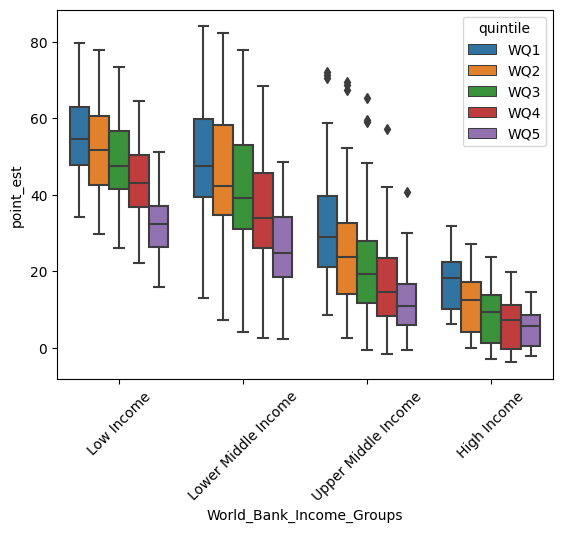

In [148]:
sns.boxplot(data=df_wealth_box[df_wealth_box['year_group']=='90s'], x='World_Bank_Income_Groups', y='point_est', hue='quintile')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Low Income'),
  Text(1, 0, 'Lower Middle Income'),
  Text(2, 0, 'Upper Middle Income'),
  Text(3, 0, 'High Income')])

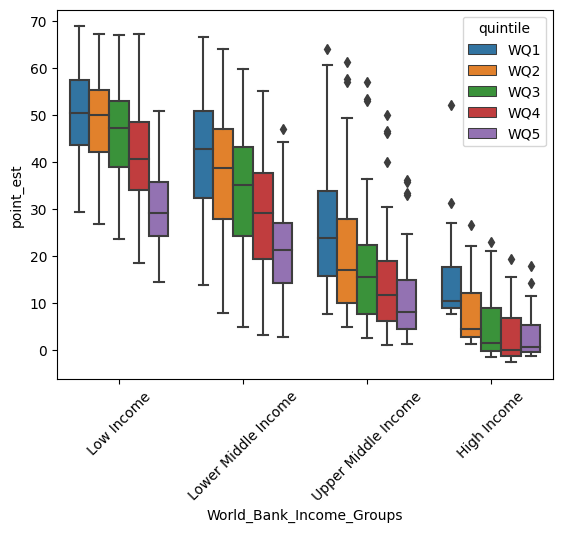

In [150]:
sns.boxplot(data=df_wealth_box[df_wealth_box['year_group']=='2000s'], x='World_Bank_Income_Groups', y='point_est', 
            hue='quintile', order=['Low Income', 'Lower Middle Income', 'Upper Middle Income', 'High Income'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Low Income'),
  Text(1, 0, 'Lower Middle Income'),
  Text(2, 0, 'Upper Middle Income'),
  Text(3, 0, 'High Income')])

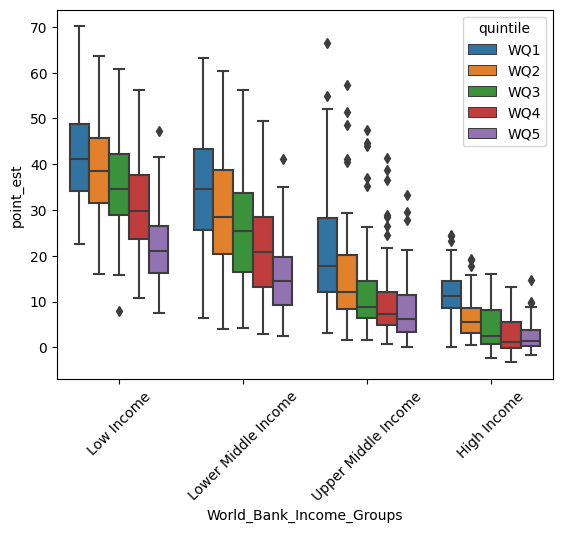

In [151]:
sns.boxplot(data=df_wealth_box[df_wealth_box['year_group']=='2010+'], x='World_Bank_Income_Groups', y='point_est', 
            hue='quintile', order=['Low Income', 'Lower Middle Income', 'Upper Middle Income', 'High Income'])
plt.xticks(rotation=45)

## KDE plot across age

In [181]:
ftrs_sel = ['World_Bank_Income_Groups', 'year_group', '0_to_5_months_Point_Estimate',
       '6_to_11_months_Point_Estimate', '12_to_23_months_Point_Estimate',
       '0_to_23_months_Point_Estimate', '24_to_35_months_Point_Estimate',
       '36_to_47_months_Point_Estimate', '48_to_59_months_Point_Estimate',
       '24_to_59_months_Point_Estimate', 'National_Point_Estimate']
df_age = df_clean[ftrs_sel]

In [184]:
df_age_box = pd.melt(df_age, id_vars=['World_Bank_Income_Groups', 'year_group'], 
                        value_vars=['0_to_5_months_Point_Estimate',
       '6_to_11_months_Point_Estimate', '12_to_23_months_Point_Estimate',
       '24_to_59_months_Point_Estimate', 'National_Point_Estimate'])
df_age_box.rename(columns={'variable':'age', 'value':'point_est'}, inplace=True)

In [189]:
df_age_box['age'] = df_age_box['age'].apply(lambda x: 'Point_Estimate' if x=='National_Point_Estimate' else x)
df_age_box['age'].value_counts()

0_to_5_months_Point_Estimate      1051
6_to_11_months_Point_Estimate     1051
12_to_23_months_Point_Estimate    1051
24_to_59_months_Point_Estimate    1051
Point_Estimate                    1051
Name: age, dtype: int64

<AxesSubplot: xlabel='point_est', ylabel='Density'>

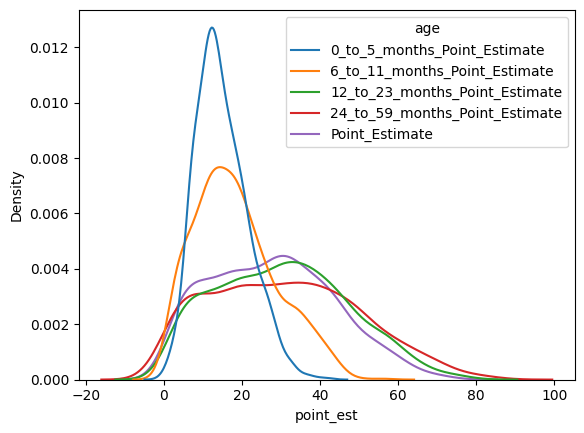

In [190]:
sns.kdeplot(data=df_age_box, x='point_est', hue='age')

### Low Income groups

<AxesSubplot: xlabel='point_est', ylabel='Density'>

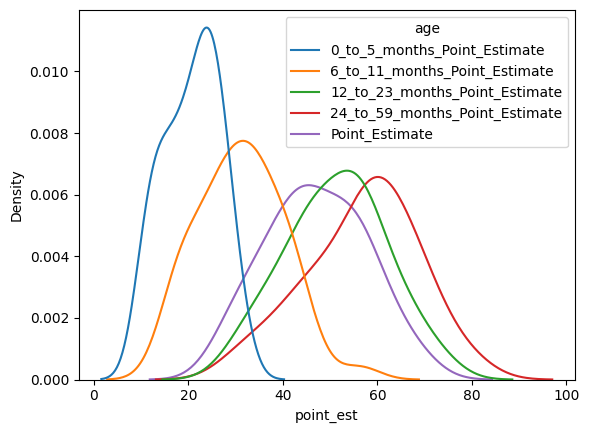

In [191]:
sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Low Income') & 
                            (df_age_box['year_group']=='90s')], x='point_est', hue='age')

<AxesSubplot: xlabel='point_est', ylabel='Density'>

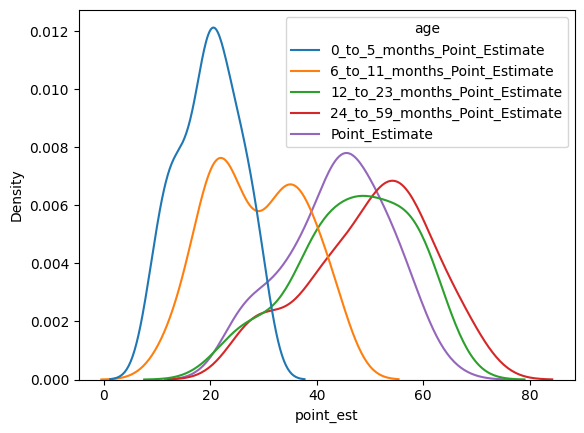

In [192]:
sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Low Income') & 
                            (df_age_box['year_group']=='2000s')], x='point_est', hue='age')

<AxesSubplot: xlabel='point_est', ylabel='Density'>

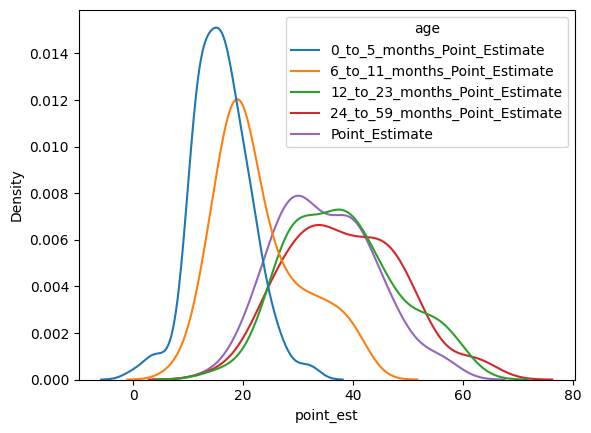

In [193]:
sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Low Income') & 
                            (df_age_box['year_group']=='2010+')], x='point_est', hue='age')

### Lower Middle Income group

<AxesSubplot: xlabel='point_est', ylabel='Density'>

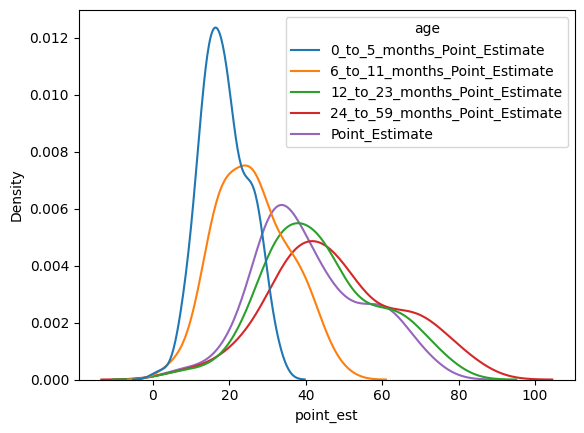

In [194]:
sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Lower Middle Income') & 
                            (df_age_box['year_group']=='90s')], x='point_est', hue='age')

<AxesSubplot: xlabel='point_est', ylabel='Density'>

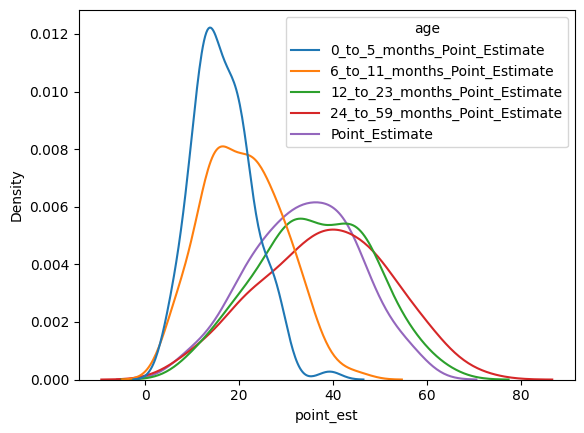

In [195]:
sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Lower Middle Income') & 
                            (df_age_box['year_group']=='2000s')], x='point_est', hue='age')

<AxesSubplot: xlabel='point_est', ylabel='Density'>

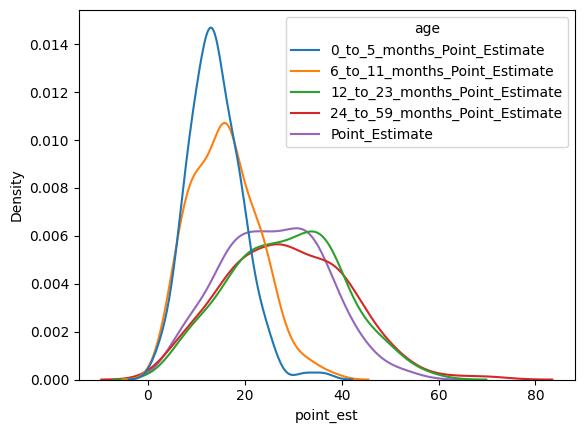

In [197]:
sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Lower Middle Income') & 
                            (df_age_box['year_group']=='2010+')], x='point_est', hue='age')

### Upper Middle Income

<AxesSubplot: xlabel='point_est', ylabel='Density'>

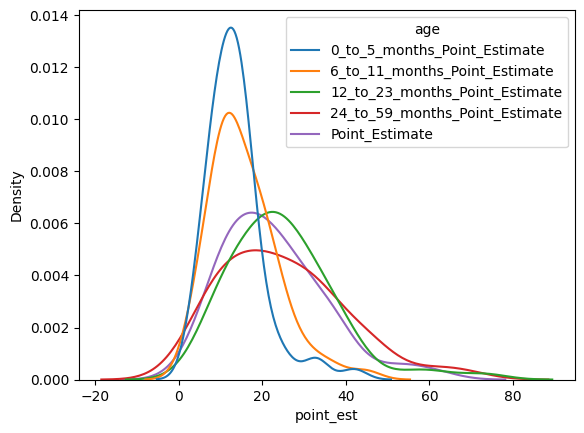

In [199]:
sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Upper Middle Income') & 
                            (df_age_box['year_group']=='90s')], x='point_est', hue='age')

<AxesSubplot: xlabel='point_est', ylabel='Density'>

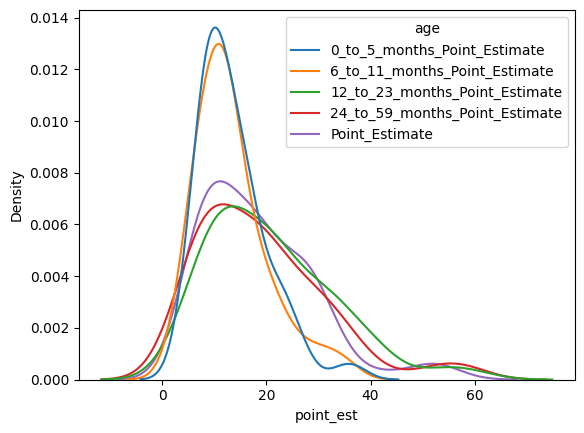

In [200]:
sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Upper Middle Income') & 
                            (df_age_box['year_group']=='2000s')], x='point_est', hue='age')

<AxesSubplot: xlabel='point_est', ylabel='Density'>

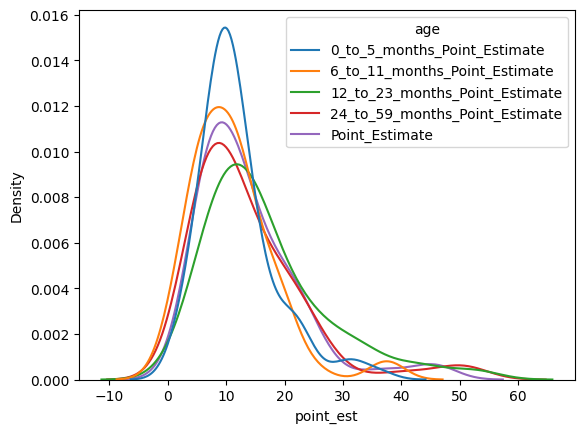

In [201]:
sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='Upper Middle Income') & 
                            (df_age_box['year_group']=='2010+')], x='point_est', hue='age')

### High Income

<AxesSubplot: xlabel='point_est', ylabel='Density'>

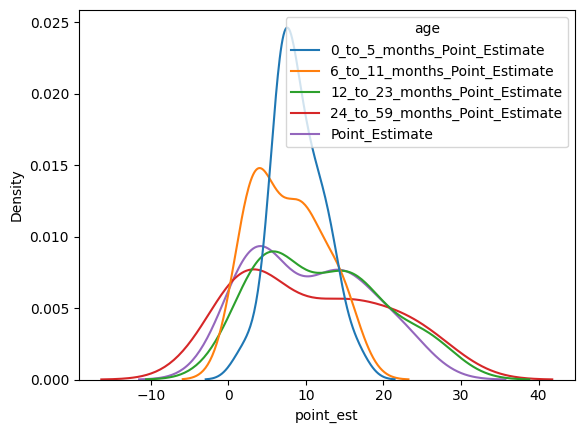

In [202]:
sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='High Income') & 
                            (df_age_box['year_group']=='90s')], x='point_est', hue='age')

<AxesSubplot: xlabel='point_est', ylabel='Density'>

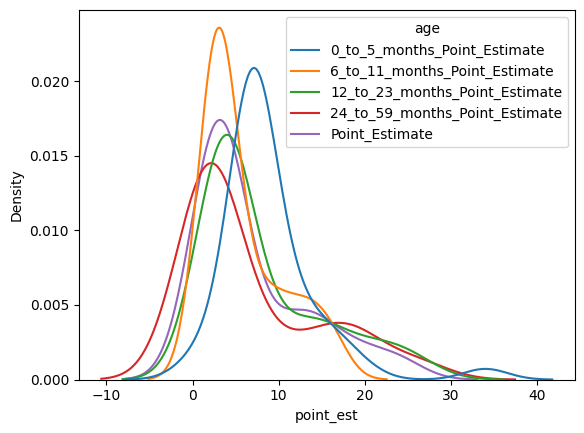

In [203]:
sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='High Income') & 
                            (df_age_box['year_group']=='2000s')], x='point_est', hue='age')

<AxesSubplot: xlabel='point_est', ylabel='Density'>

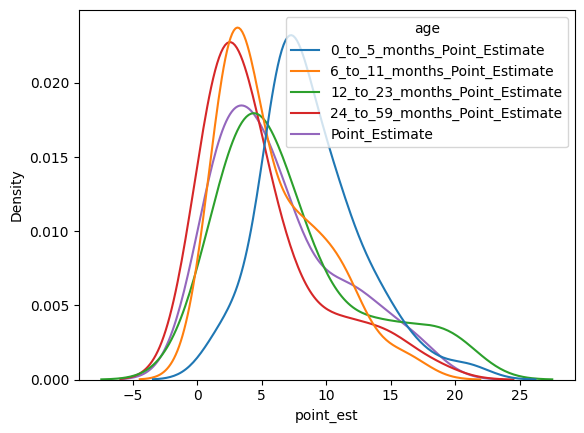

In [204]:
sns.kdeplot(data=df_age_box[(df_age_box['World_Bank_Income_Groups']=='High Income') & 
                            (df_age_box['year_group']=='2010+')], x='point_est', hue='age')